In [3]:
import torch
from torchvision import models, transforms
from PIL import Image
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [6]:
# Загрузка предобученной модели ResNet50
model = models.resnet50(pretrained=True)
model = torch.nn.Sequential(*(list(model.children())[:-1]))  # Убираем последний классификационный слой
model.eval()

# Трансформации для изображений
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

def get_embedding(image_path):
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0)
    with torch.no_grad():
        embedding = model(image)
    return embedding.squeeze()

Сходство между изображениями: 0.5955724716186523


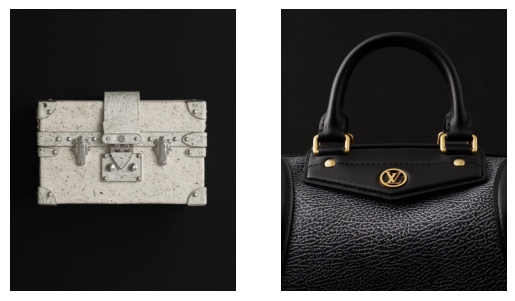

In [9]:

image_path1 = r"parsing\instagram_parser\data\louisvuitton\media\DAtb3ygNRZL_3.jpg"  # Путь к первому изображению
image_path2 = r"parsing\instagram_parser\data\louisvuitton\media\DAtb3ygNRZL_6.jpg"  # Путь ко второму изображению

# Пример сравнения двух изображений
embedding1 = get_embedding(image_path1)
embedding2 = get_embedding(image_path2)

# Косинусное сходство между эмбеддингами
similarity = F.cosine_similarity(embedding1, embedding2, dim=0)
print(f"Сходство между изображениями: {similarity.item()}")

# Отображение изображения в Jupyter
image1 = Image.open(image_path1)
image2 = Image.open(image_path2)

# Визуализация
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.axis('off')

plt.show()


Сходство между изображениями: 0.9137017130851746


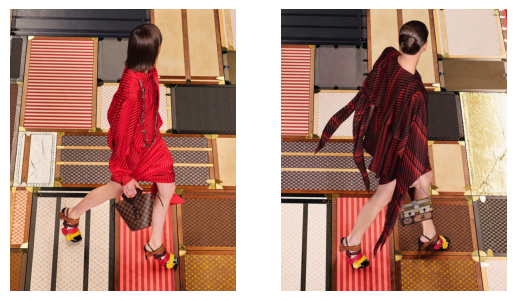

In [5]:
image_path1 = r"parsing\instagram_parser\data\louisvuitton\media\DAtb3ygNRZL_1.jpg"  # Путь к первому изображению
image_path2 = r"parsing\instagram_parser\data\louisvuitton\media\DAtb3ygNRZL_4.jpg"  # Путь ко второму изображению

# Пример сравнения двух изображений
embedding1 = get_embedding(image_path1)
embedding2 = get_embedding(image_path2)

# Косинусное сходство между эмбеддингами
similarity = F.cosine_similarity(embedding1, embedding2, dim=0)
print(f"Сходство между изображениями: {similarity.item()}")

# Отображение изображения в Jupyter
image1 = Image.open(image_path1)
image2 = Image.open(image_path2)

# Визуализация
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.axis('off')

plt.show()